# Mandelbrot Set
The Mandelbrot set is the set of complex numbers $c$ for which the absolute value of the sequence $z_n$ remains bounded for all $n > 0$, where $z_n$ is:
$$
\begin{align}
z_0 &= 0, \\
z_{n+1} &= z_n^2 + c.
\end{align}
$$
For any complex number $c$, one of two things will happen:
- The sequence blows up to infinity ($|z_n| \gt 2$)
- The sequence if bounded ($|z_n| \le 2$)

Then, $c$ belongs to the Mandelbrot set $M$ if the second case ($|z_n| \le 2$) holds:
$$
M = \{c \in \mathbb{C} \mid \lvert z_n \rvert \le 2 \}.
$$

## Naïve escape time algorithm

In [1]:
import numpy as np

def f_c_naive(c, max_iter=256):
    z = 0
    i = 0

    while np.abs(z) <= 2 and i < max_iter:
        z = z**2 + c
        i += 1
    
    return z, i

In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import colors

def visualize_mandelbrot(f, width=600, height=400, start=-2 - 1.12j, end=1 + 1.12j,
                         max_iter=256, colorized=False, cm=plt.get_cmap("jet"),
                         smoothing=False):
    imag = Image.new("RGB", (width, height), (0, 0, 0))
    draw = ImageDraw.Draw(imag)

    for x in range(width):
        for y in range(height):
            # scale coordinates to fall within start and end
            c = complex(
                start.real + (x/width * (end.real - start.real)),
                start.imag + (y/height * (end.imag - start.imag))
            )
            z, i = f(c, max_iter=max_iter)

            if colorized:
                if smoothing:
                    i = i + 1 - np.log(np.log2(np.abs(z))) if i != max_iter else max_iter
                
                color = cm(1 - i/max_iter)
                r = int(color[0]*255)
                g = int(color[1]*255)
                b = int(color[2]*255)
                #v = 255 if i < max_iter else 0
                draw.point([x, y], (r, g, b))
            else:
                color = 255 - int(i*255 / max_iter)
                draw.point([x, y], (color, color, color))
    
    return imag

## Optimized escape time algorithm

In [4]:
def f_c_optimized(c, max_iter=256):
    x = c.real
    y = c.imag
    x2 = 0
    y2 = 0
    w = 0
    i = 0
    
    while (x2 + y2) <= 4 and i < max_iter:
        x = x2 - y2 + c.real
        y = w - x2 - y2 + c.imag
        x2 = x**2
        y2 = y**2
        w = (x + y)*(x +y)
        i += 1
    
    return complex(x2, y2), i

Wall time: 9.25 s


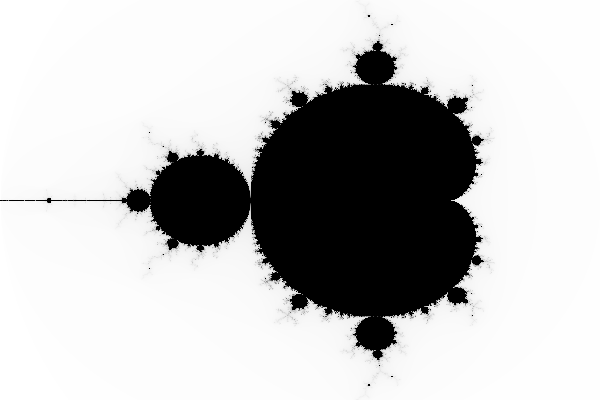

In [5]:
%%time
visualize_mandelbrot(f_c_optimized)

In [6]:
from cpp_stoch import (
    f_c as f_c_cpp,
    mandelbrot_grid,
    set_num_threads,
    get_num_threads
)

Wall time: 697 ms


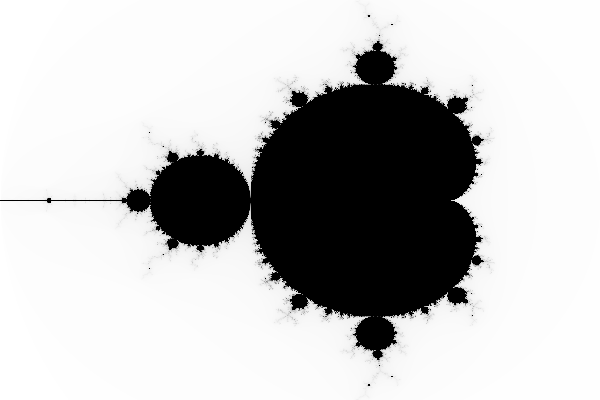

In [7]:
%%time
visualize_mandelbrot(f_c_cpp)

In [8]:
def visualize_grid(grid, max_iter=256, colorized=False, cm=plt.get_cmap("jet"), smoothing=False):
    width = len(grid)
    height = len(grid[0])

    imag = Image.new("RGB", (width, height), (0, 0, 0))
    draw = ImageDraw.Draw(imag)

    for x in range(width):
        for y in range(height):
            z, i = grid[x][y]
            if colorized:
                if smoothing:
                    i = i + 1 - np.log(np.log2(np.abs(z))) if i != max_iter else max_iter
                
                color = cm(1 - i/max_iter)
                r = int(color[0]*255)
                g = int(color[1]*255)
                b = int(color[2]*255)
                #v = 255 if i < max_iter else 0
                draw.point([x, y], (r, g, b))
            else:
                color = 255 - int(i*255 / max_iter)
                draw.point([x, y], (color, color, color))
    
    return imag

Wall time: 8.65 s


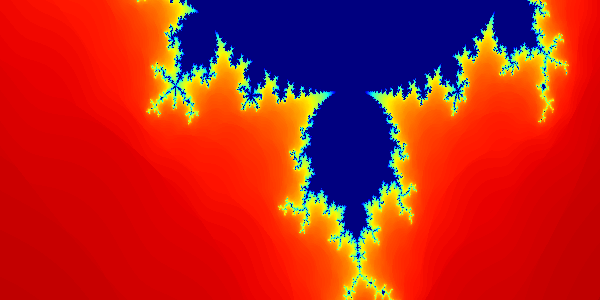

In [30]:
%%time
grid = mandelbrot_grid(width=600, height=300, max_iter=50,
                     start=-1 - 0.5j, end=0.5 - 1j)
visualize_grid(grid, max_iter=50, colorized=True, smoothing=True)

Wall time: 7min 8s


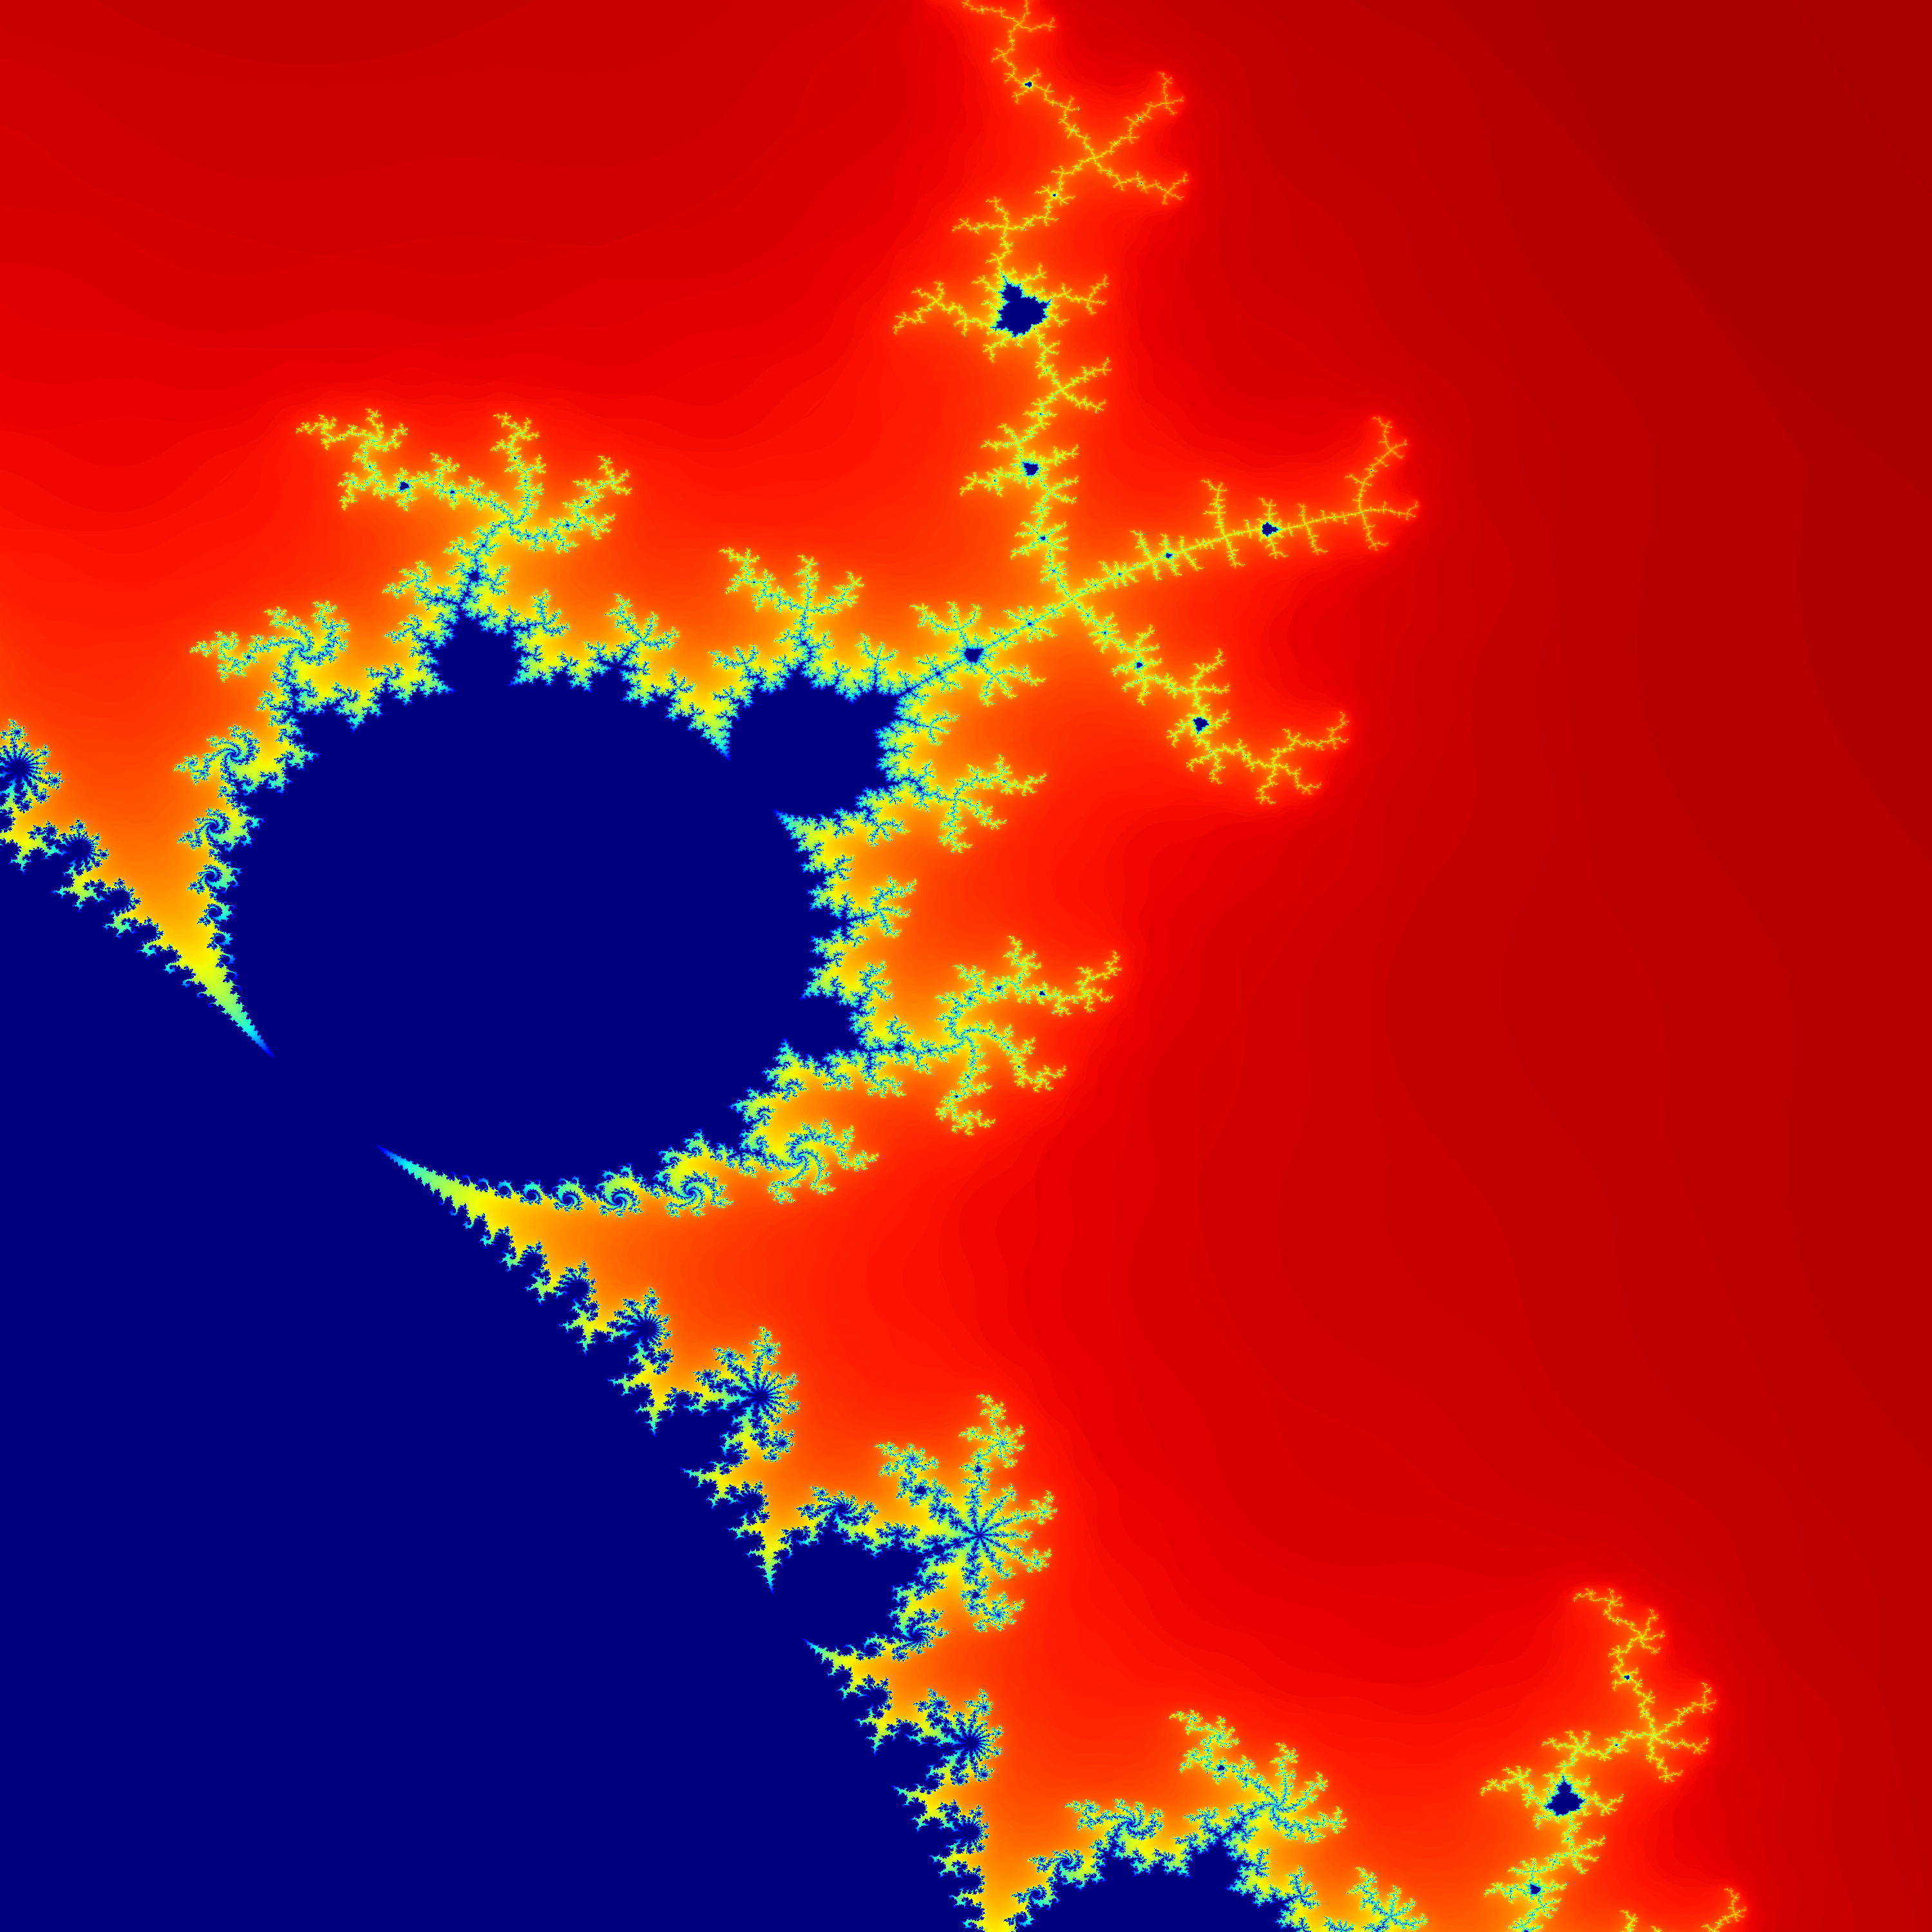

In [10]:
%%time
grid = mandelbrot_grid(width=3000, height=3000, max_iter=100,
                     start=0.2 - 0.7j, end=0.5 - 0.35j)
visualize_grid(grid, max_iter=100, colorized=True, smoothing=True)

CPU times: user 9min 2s, sys: 1.27 s, total: 9min 4s
Wall time: 9min 3s


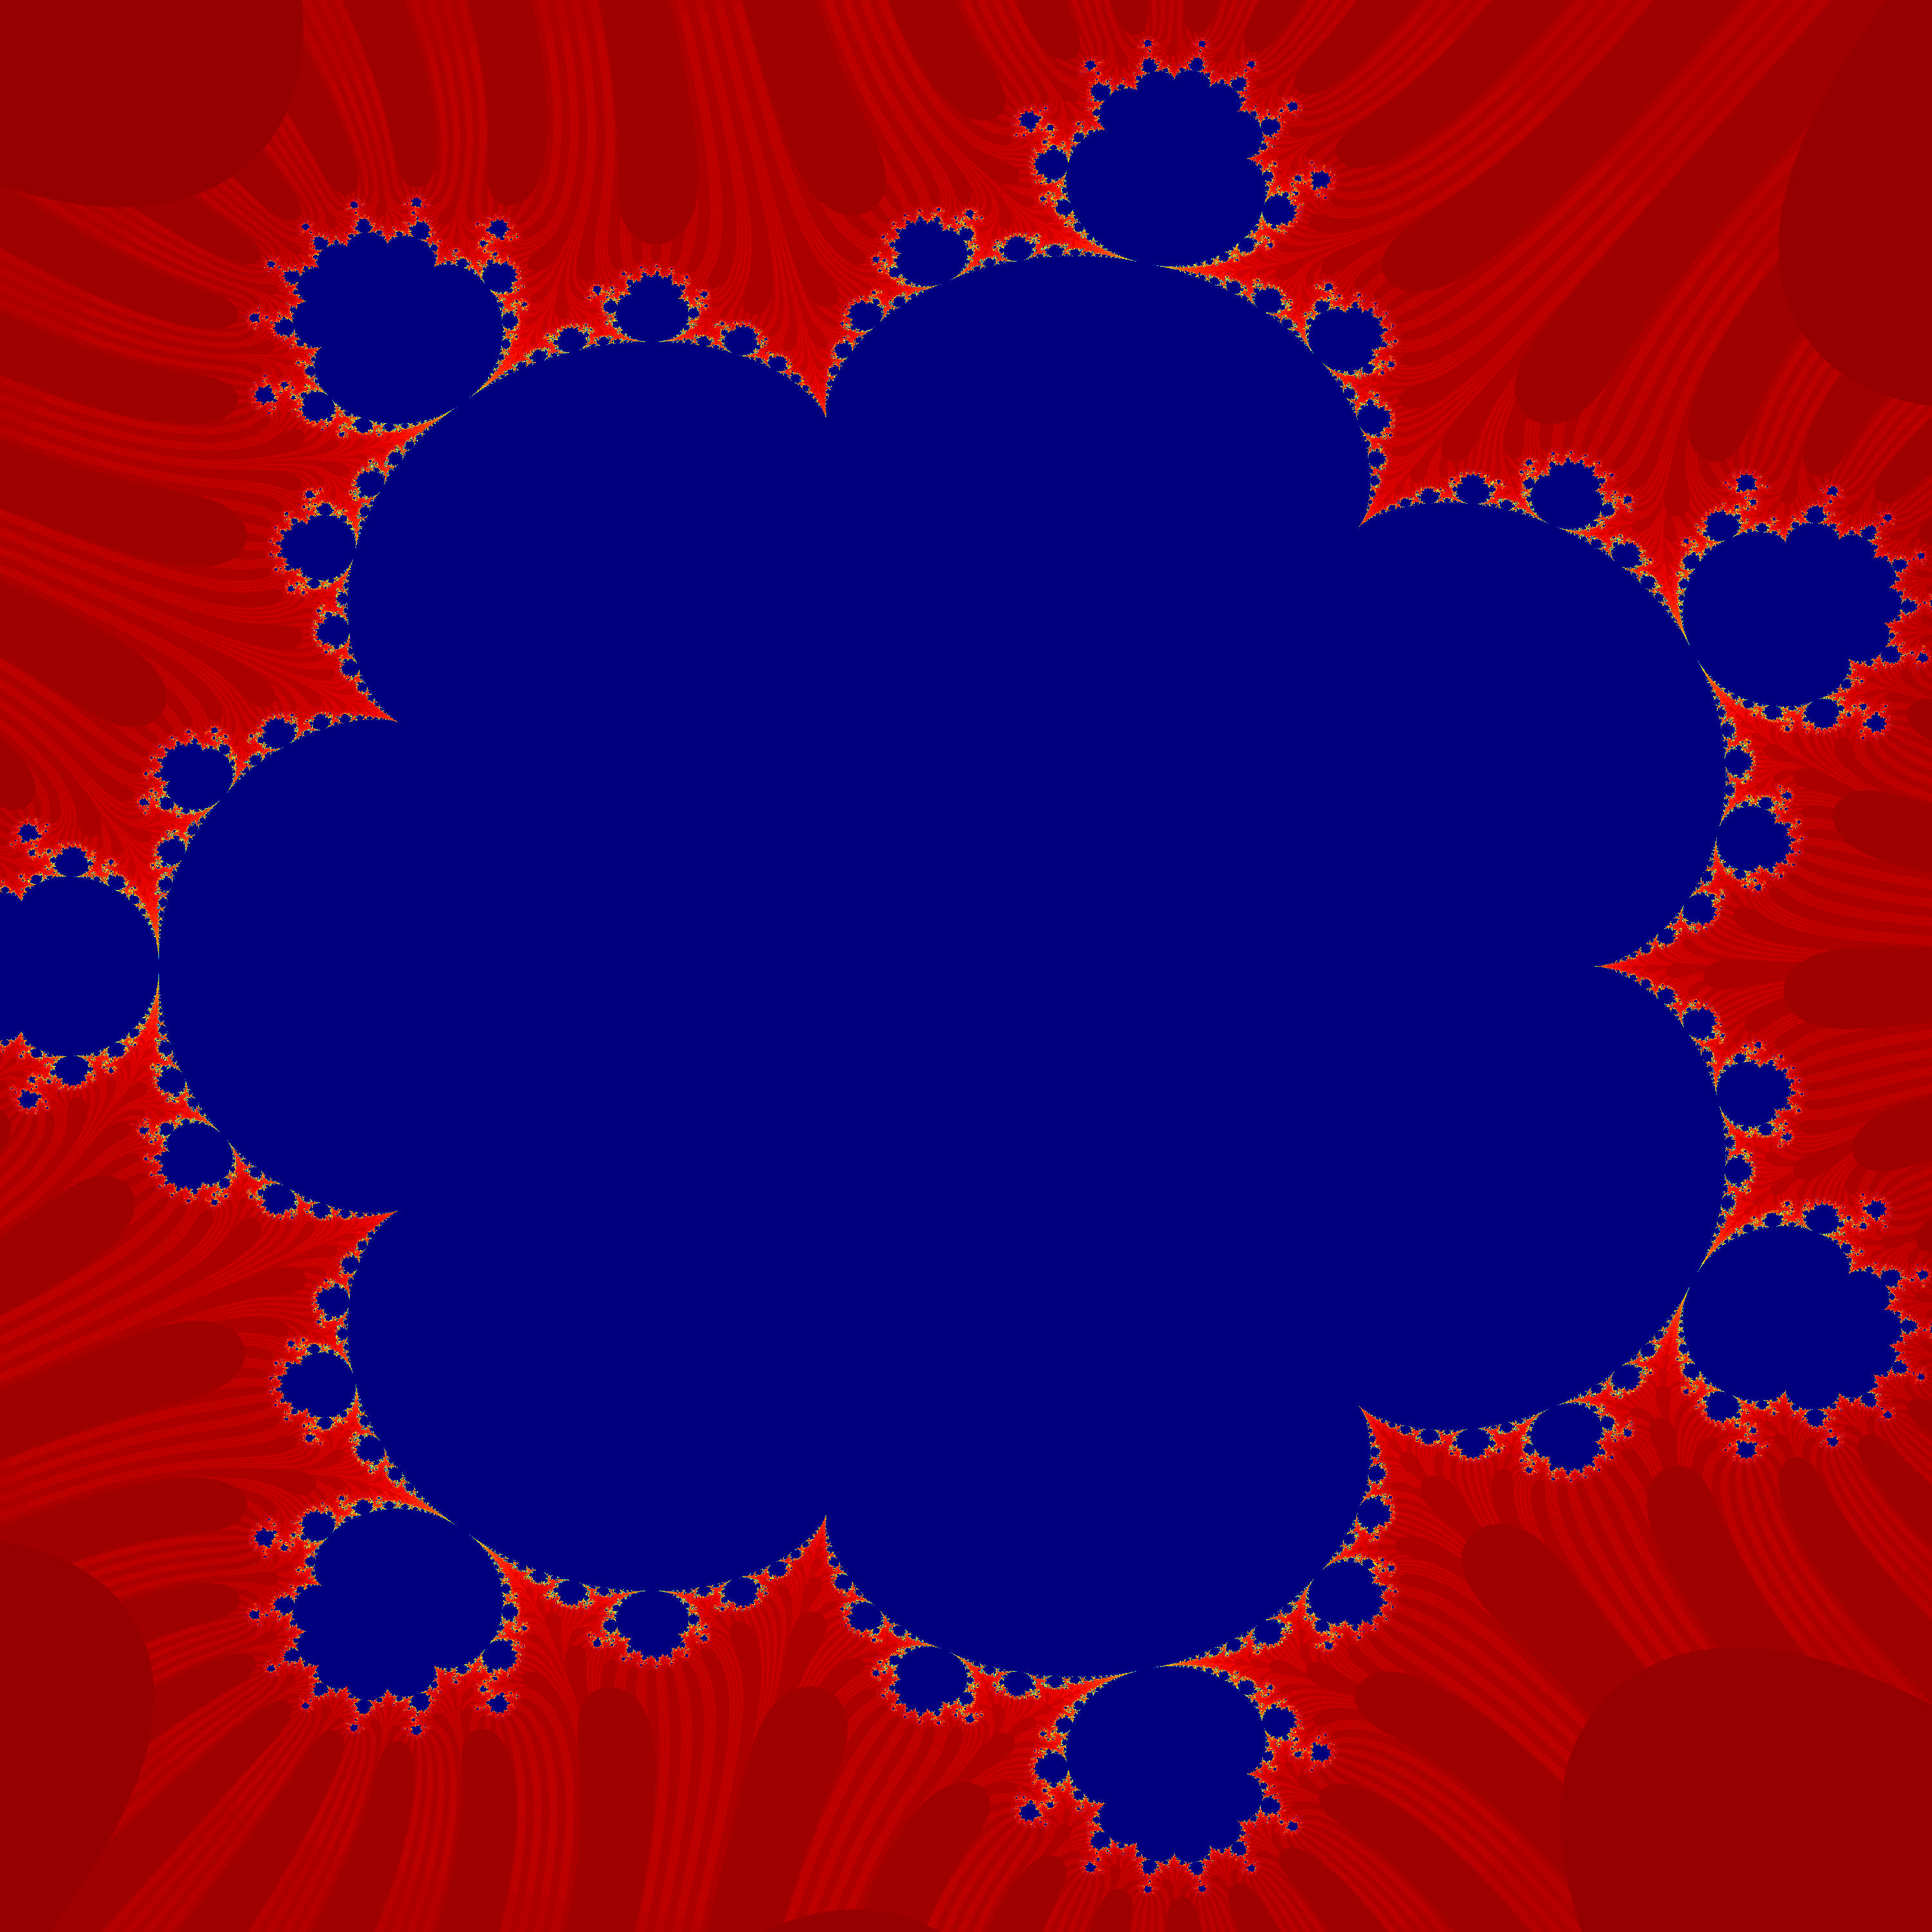

In [14]:
%%time
grid = mandelbrot_grid(width=3000, height=3000, max_iter=100, d=8,
                       start=-1 - 1.12j, end=1 + 1.12j)
visualize_grid(grid, max_iter=100, colorized=True)

In [6]:
%%time
set_num_threads(8)
print(get_num_threads())
grid = mandelbrot_grid(width=3000, height=3000, max_iter=100, d=8,
                       start=-1 - 1.12j, end=1 + 1.12j)
visualize_grid(grid, max_iter=100, colorized=True)

1


KeyboardInterrupt: 